# Final Project


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.tree as skt
import sklearn.ensemble as skens
import seaborn as sns

## Introduction

### Assignment

In this final project you be analyzing a data set using techniques from Data Science 101. The goal of this project is to demonstrate your ability to apply the concepts you have learned in this course to a real-world data set. You will be graded on the quality of your analysis, the clarity of your code, and the effectiveness of your communication.

Each section will contain a brief description of the task, followed by a code cell where you will write your code. You should write your code in the code cell and run it to generate the output. You will need to interpret the results of your analysis in a way that is understandable to people without a background in statistics or Python programming You should use markdown to format your text in a legible way.

**Individual Effort Policy**: You may use any resources you like to complete this project, including the internet, textbooks, and discussions with other people. You may also use GenAI tools like Copilot or ChatGPT. It is expected that students will use GenAI tools for writing code, and no citation will be required for GenAI assisted code. For the written portions of the project, use of GenAI should be cited in a way that make clear how the GenAI tool was used. The *GenAI Appendix* section at the end provides a template you can use to indicate how you used tools like ChatGPT for each section. You should be prepared to explain any code or written responses that you submit upon request.

### Background

In this assignment, we will analyze two data sets from "Wolves and Moose of Isle Royale" project. The data sets contain information about the populations of wolves and moose on Isle Royale, an island in Lake Superior. The data sets include information about the number of wolves and moose on the island, as well as other variables that may be related to the populations of wolves and moose.

> Isle Royale is a remote wilderness island, isolated by the frigid waters of Lake Superior, and home to populations of wolves and moose. As predator and prey, their lives and deaths are linked in a drama that is timeless and historic. Their lives are historic because we have been documenting their lives for more than five decades. This research project is the longest continuous study of any predator-prey system in the world. ([Source](https://isleroyalewolf.org/overview/overview/at_a_glance.html))

You may find it helpful to read the most recent [Annual Report](https://isleroyalewolf.org/sites/default/files/annual-report-pdf/WolfMooseReport_2024_final-web.pdf) to learn more about the project.


## Data

The data for this project are contained in two CSV files:

In [39]:
wolf_moose_yearly = pd.read_csv("./wolf_moose_yearly.csv", na_values = ["NA", "N/A", "N/A yet", "NA yet"])
moose_deaths = pd.read_csv("./moose_deaths.csv")

The `wolf_moose_yearly` data set contains yearly counts of wolf and moose population, along with variables about the environment and other factors that may be related to the populations. The `moose_deaths` data set contains information about the age and size of decreased moose on Isle Royale.

**Task**: Report the number of rows and columns in each data set. Report the column names in each data set.

In [40]:
print("the number of rows in wolf_moose_yearly is", wolf_moose_yearly.shape[0])
print("the number of columns in wolf_moose_yearly is", wolf_moose_yearly.shape[1])
print("the number of rows in moose_deaths is", moose_deaths.shape[0])
print("the number of columns in moose_deaths is", moose_deaths.shape[1])

print("the column names in wolf_moose_yearly are", wolf_moose_yearly.columns)
print("the column names in moose_deaths are", moose_deaths.columns)


the number of rows in wolf_moose_yearly is 61
the number of columns in wolf_moose_yearly is 15
the number of rows in moose_deaths is 662
the number of columns in moose_deaths is 8
the column names in wolf_moose_yearly are Index(['year', 'wolves', 'moose', 'kill rate', 'predation rate',
       'moose recruitment rate', 'moose mean age excluding calves',
       'July-Sept (temp, F)', 'Apr-May (temp, F)', 'Jan-Feb (temp, F)',
       'May-Aug (precip, inches)', 'NAO (DJFM - station based)',
       'NAO - annual', 'snow.depth (cm)', 'ice bridges (0=none, 1 = present)'],
      dtype='object')
the column names in moose_deaths are Index(['Sex', 'Year of birth', 'Cranial Volume (cm3)',
       'Winter temperature (standardized)', 'Moose abundance (standardized)',
       'Wolf abundance (standardized)', 'Winter temperature (categorical)',
       'Age at death'],
      dtype='object')


### Codebook

These data do not include a code-book, but there is written documentation on many of the concepts of what is measured on the [Data & Interpreation](https://isleroyalewolf.org/data/data/home.html) page from the Isle Royale project. For the "NAO" columns, see [this page](https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-station-based). 

**Task**: We will create our own code-book. For each of the variables in both tables complete this template:

* Variable Name:
* Description:
* Type: (e.g., numeric, categorical, etc.)

If there are several variables that are essentially the same, you may summarize them together as a single entry.

# Wolf-Moose Yearly Dataset Codebook

## Time Variables
* Variable Name: year
* Description: Calendar year of observation
* Type: numeric (discrete)

## Population Counts
* Variable Name: wolves, moose
* Description: Annual count of wolves and moose on Isle Royale
* Type: numeric (discrete)

## Population Dynamics
* Variable Name: kill rate
* Description: Number of moose killed per wolf per year
* Type: numeric (continuous)

* Variable Name: predation rate
* Description: Proportion of moose population killed by wolves
* Type: numeric (continuous)

* Variable Name: moose recruitment rate
* Description: Rate at which new moose are added to the population
* Type: numeric (continuous)

* Variable Name: moose mean age excluding calves
* Description: Average age of moose population, not including calves
* Type: numeric (continuous)

## Weather Variables
* Variable Name: July-Sept (temp, F), Apr-May (temp, F), Jan-Feb (temp, F)
* Description: Average temperature in Fahrenheit for specified months
* Type: numeric (continuous)

* Variable Name: May-Aug (precip, inches)
* Description: Total precipitation in inches during summer months
* Type: numeric (continuous)

* Variable Name: snow.depth (cm)
* Description: Snow depth measurement in centimeters
* Type: numeric (continuous)

## Climate Indices
* Variable Name: NAO (DJFM - station based), NAO - annual
* Description: North Atlantic Oscillation index measurements (winter and annual)
* Type: numeric (continuous)

## Environmental Conditions
* Variable Name: ice bridges (0=none, 1 = present)
* Description: Binary indicator of ice bridge formation between mainland and island
* Type: categorical (binary)

# Moose Deaths Dataset Codebook

## Demographic Information
* Variable Name: Sex
* Description: Gender of the deceased moose
* Type: categorical (binary)

* Variable Name: Year of birth
* Description: Birth year of the deceased moose
* Type: numeric (discrete)

* Variable Name: Age at death
* Description: Age of moose when it died
* Type: numeric (discrete)

## Physical Characteristics
* Variable Name: Cranial Volume (cm3)
* Description: Volume of moose skull in cubic centimeters
* Type: numeric (continuous)

## Environmental Conditions
* Variable Name: Winter temperature (standardized)
* Description: Standardized measurement of winter temperature
* Type: numeric (continuous)

* Variable Name: Winter temperature (categorical)
* Description: Categorized version of winter temperature
* Type: categorical

## Population Metrics
* Variable Name: Moose abundance (standardized)
* Description: Standardized measurement of moose population size
* Type: numeric (continuous)

* Variable Name: Wolf abundance (standardized)
* Description: Standardized measurement of wolf population size
* Type: numeric (continuous)

### Data Cleaning

**Task**: Check for missing values in each data set. If there are missing values, report the number of missing values for each variable.

In [41]:
print("Checking for missing values in wolf_moose_yearly...")
print("the number of missing values in wolf_moose_yearly is", wolf_moose_yearly.isnull().sum())
print("the number of missing values in moose_deaths is", moose_deaths.isnull().sum())


Checking for missing values in wolf_moose_yearly...
the number of missing values in wolf_moose_yearly is year                                  0
wolves                                0
moose                                 0
kill rate                            13
predation rate                       13
moose recruitment rate                3
moose mean age excluding calves      12
July-Sept (temp, F)                   1
Apr-May (temp, F)                     0
Jan-Feb (temp, F)                     0
May-Aug (precip, inches)              1
NAO (DJFM - station based)            1
NAO - annual                          2
snow.depth (cm)                      16
ice bridges (0=none, 1 = present)     0
dtype: int64
the number of missing values in moose_deaths is Sex                                  0
Year of birth                        0
Cranial Volume (cm3)                 0
Winter temperature (standardized)    0
Moose abundance (standardized)       0
Wolf abundance (standardized)        0


**Task**: suggest a strategy for dealing with missing values in each data set.

One strategy is to drop the missing values from the data set. This is a good strategy becuase the missing values are minimal and the data set is large.

## Exploratory Data Analysis

In this section, you will explore the distributions of the variables in the data sets. You will also explore the relationships between variables in the data sets.

### Univariate Exploration

**Task**: In this section, select one variable of each type listed below and describe the distribution of the variable. Include at least one plot and at least one numerical summary in your description.

#### Discrete Variable

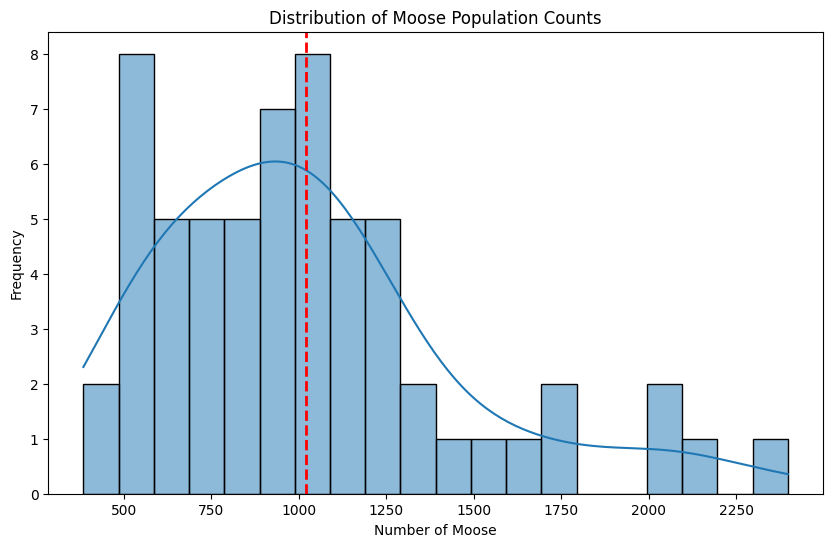

Numerical Summary of Moose Population Counts:
count      61.000000
mean     1020.639344
std       434.493883
min       385.000000
25%       750.000000
50%       975.000000
75%      1203.000000
max      2398.000000
Name: moose, dtype: float64


In [68]:
# Annual Population count of wolves on Isle Royale.

# Get Mean for Mean Line
mean_moose = wolf_moose_yearly['moose'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(wolf_moose_yearly['moose'], bins=20, kde=True)
plt.axvline(mean_moose, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_moose:.2f}')
plt.title('Distribution of Moose Population Counts')
plt.xlabel('Number of Moose')
plt.ylabel('Frequency')
plt.show()

# Numerical summary
moose_summary = wolf_moose_yearly['moose'].describe()
print("Numerical Summary of Moose Population Counts:")
print(moose_summary)



**The Distribution of Moose has a central tendency past the peak of the density distribution. The mean line is past the peak of this density distribution so the distribution is left skewed.**

#### Numeric Variable

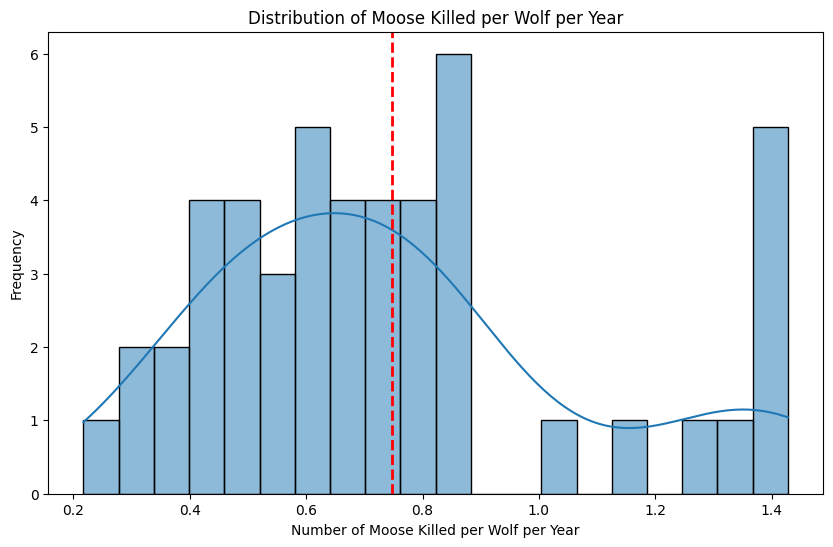

Numerical Summary of Kill Rate:
count    48.000000
mean      0.748146
std       0.320205
min       0.217000
25%       0.507000
50%       0.682500
75%       0.865250
max       1.428000
Name: kill rate, dtype: float64


In [69]:
#Kill Rate- Number of Moose Killed per Wolf per year

# Get Mean for Mean Line
mean_kill_rate = wolf_moose_yearly['kill rate'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(wolf_moose_yearly['kill rate'], bins=20, kde=True)
plt.axvline(mean_kill_rate, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_kill_rate:.2f}')
plt.title('Distribution of Moose Killed per Wolf per Year')
plt.xlabel('Number of Moose Killed per Wolf per Year')
plt.ylabel('Frequency')
plt.show()

# Numerical summary
kill_rate_summary = wolf_moose_yearly['kill rate'].describe()
print("Numerical Summary of Kill Rate:")
print(kill_rate_summary)


**The Distribution of Kill Rate(Number of Moose Killed per Wolf per Year) has a central tendency past the peak of the density distribution. The mean line is past the peak of this density distribution so the distribution is left skewed.**


### Multivariate Exploration


**Task**: In this section, select pairs of variables of combination of types listed below and describe either the joint distributions or conditional distributions in which you condition on one of the variables. Include at least one plot and at least one numerical summary in your description.



#### Discrete-Discrete

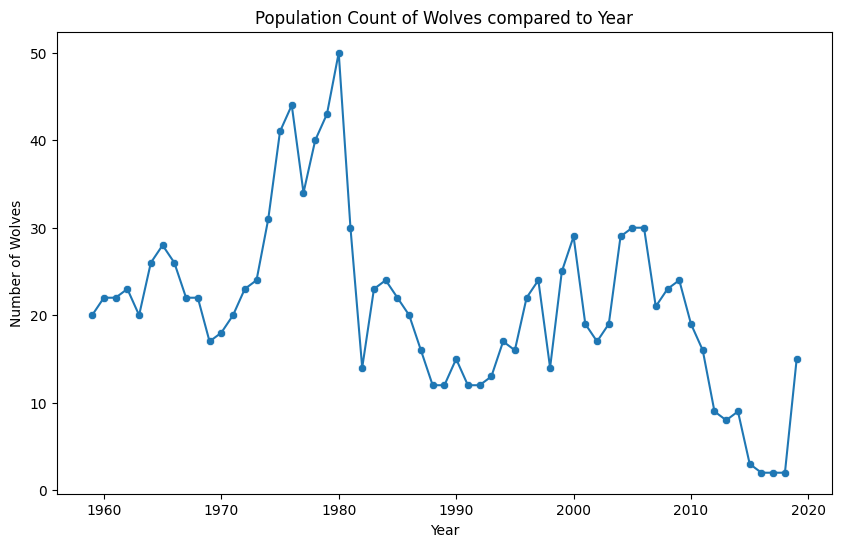

Numerical Summary of Wolf Population Counts:
count    61.000000
mean     21.065574
std       9.998115
min       2.000000
25%      15.000000
50%      21.000000
75%      25.000000
max      50.000000
Name: wolves, dtype: float64


In [51]:
# Population Count of Wolves(Discrete) compared to Year(Discrete)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='wolves', data=wolf_moose_yearly)
sns.lineplot(x='year', y='wolves', data=wolf_moose_yearly)
plt.title('Population Count of Wolves compared to Year')
plt.xlabel('Year')
plt.ylabel('Number of Wolves')
plt.show()

# Numerical summary
wolves_summary = wolf_moose_yearly['wolves'].describe()
print("Numerical Summary of Wolf Population Counts:")
print(wolves_summary)


**This plot shows the population count of wolves compared to the year. The conditional distribution here is the distribition of wolf population counts given each specifc year. For example we can say "for each yearm, what is the distribution of wolf population counts?"**

#### Discrete-Numeric

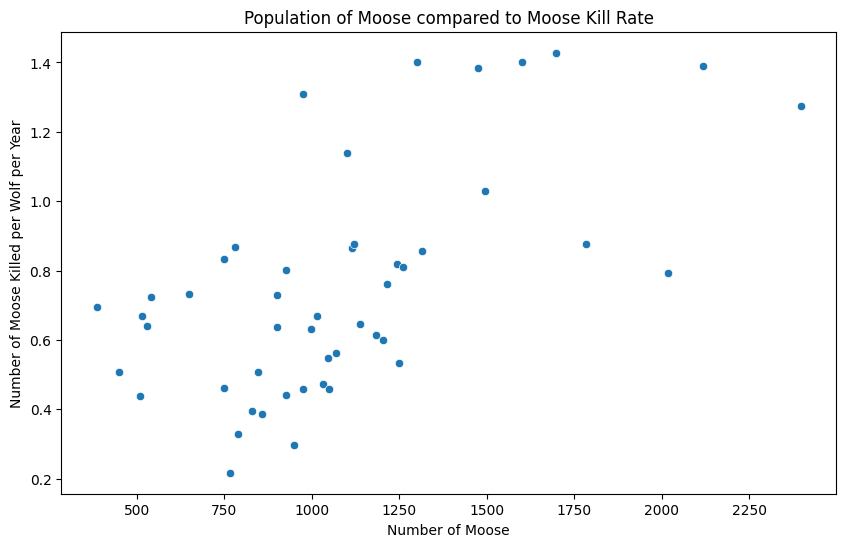

Numerical Summary of Kill Rate:
count    48.000000
mean      0.748146
std       0.320205
min       0.217000
25%       0.507000
50%       0.682500
75%       0.865250
max       1.428000
Name: kill rate, dtype: float64


In [70]:
# Populaton of Moose(Discrete) to Kill Rate of Moose(Numeric)

#Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='moose', y='kill rate', data=wolf_moose_yearly)
plt.title('Population of Moose compared to Moose Kill Rate')
plt.xlabel('Number of Moose')
plt.ylabel('Number of Moose Killed per Wolf per Year')
plt.show()

# Numerical summary
kill_rate_summary = wolf_moose_yearly['kill rate'].describe()
print("Numerical Summary of Kill Rate:")
print(kill_rate_summary)


**This plot shows the population of moose compared to the kill rate of moose. The conditional distribution here is the distribition of kill rate of moose given each specifc population of moose. For example we can say "for each population of moose, what is the distribution of kill rate of moose?"**

#### Numeric-Numeric

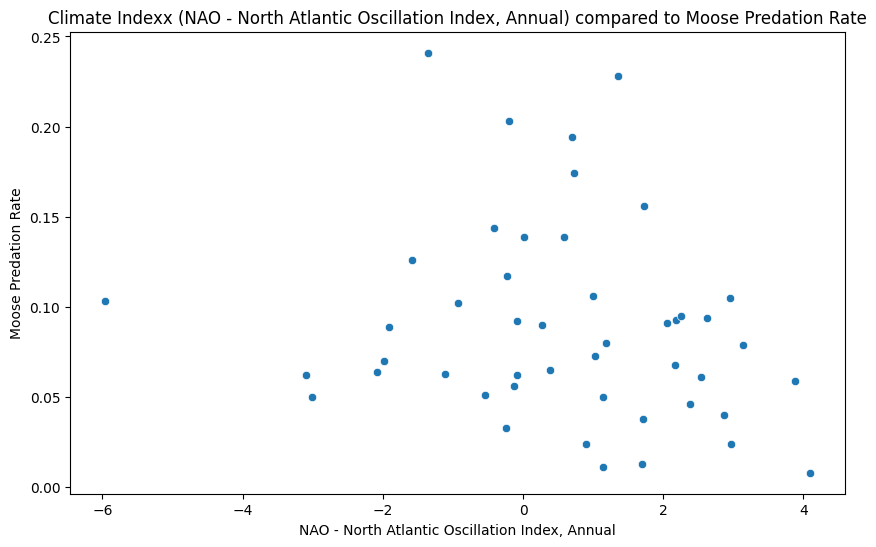

Numerical Summary of Predation Rate:
count    48.000000
mean      0.087125
std       0.055341
min       0.008000
25%       0.050750
50%       0.076000
75%       0.105250
max       0.241000
Name: predation rate, dtype: float64


In [78]:
# Climate Indexx (NAO - North Atlantic Oscillation Index, Annual)(Numeric) to Moose Predation Rate(Numeric)

#Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NAO - annual', y='predation rate', data=wolf_moose_yearly)
plt.title('Climate Indexx (NAO - North Atlantic Oscillation Index, Annual) compared to Moose Predation Rate')
plt.xlabel('NAO - North Atlantic Oscillation Index, Annual')
plt.ylabel('Moose Predation Rate')
plt.show()

# Numerical summary
predation_rate_summary = wolf_moose_yearly['predation rate'].describe()
print("Numerical Summary of Predation Rate:")
print(predation_rate_summary)


**This plot shows the climate indexx (NAO - North Atlantic Oscillation Index, Annual) compared to the moose predation rate. The conditional distribution here is the distribition of moose predation rate given each specifc climate indexx. For example we can say "for each climate indexx, what is the distribution of moose predation rate?"**


### Summary

**Task**: Based on your exploration of these data, write up a paragraph of your findings. What are the key features of the data? What relationships do you see between the variables? What variables might be related to the populations of wolves and moose on Isle Royale? Consider how these questions can be answered in the next section when we perform inference.

Variables that might be related - kill rate, temperature,moose abundance, wolf abundance

## Inference

In this section we will perform inference: make guesses about populations or future data based on our sample data.

### Population and Sampling

**Task**: Describe the population of interest in this study. What is the population you are trying to make inferences about? What is the sample in this study? What is the relationship between the population and the sample? You may consider hypothetical populations or data generating processes if you find those more natural to articulate.

### Hypothesis Testing

#### Theory

**Task**: give a theory you would like to test about the population you identified in the previous section. Explain how you can use the format of a hypothesis to test that theory. Clearly describe the population parameter, parameter space, null hypothesis, and alternative hypothesis you will use to test this theory.

#### Application

**Task**: Select a tolerance for Type I error ($\alpha$-level). Perform the hypothesis test you described in the previous section. Report the results of the test using either a rejection region or a p-value. Do you reject the null hypothesis? What is your conclusion about the theory you tested?

### Confidence Interval

#### Theory

**Task**: Identify a different population parameter than the one you used in the previous section. Explain how you can use the format of a confidence interval to make inferences about this population parameter. Clearly describe the population parameter, confidence level, and confidence interval you will use to make inferences about this population parameter.

#### Application

**Task**: Select a confidence level for your confidence interval. Compute the confidence interval for the population parameter you identified in the previous section. Report the results of the confidence interval. What is your conclusion about the population parameter you are making inferences about? What does this tell you about wolves and moose on Isle Royale?

### Regression

#### Theory

Linear regression is a statistical method that models the relationship between the conditional mean of an outcome and one or more predictors as a linear function:

$$E(Y \mid x_1, x_2, \ldots ) = a + b_1 x_1 + b_2 x_2 + \ldots $$

**Task**: Identify an outcome and two or more predictors you think may be related to the conditional mean of the outcome. Explain how you can use linear regression to model the relationship between the outcome and the predictors. Explain how linear regression can be used to test theories about the relationships between the outcome and the predictors; in particular comment on what it would mean if $b = 0$ for each of the predictors in the model.

#### Application

**Task**: Fit a linear regression model to the data. Report the results of the model. What are the coefficients of the model? What is the interpretation of the coefficients? Given either confidence intervals or hypothesis tests to test if $b = 0$ for each coefficient. What do you conclude about the relationships between the predictors and the outcome based on those intervals/tests? What is the $R^2$ of the model? What is the interpretation of the $R^2$?

### Classification

#### Theory

**Task**: Select a different outcome than the previous section that would be appropriate to use with a classification technique and predictors your think may be related to the outcome. Select a classification technique that you think would be appropriate for this data. Explain how you can use classification to model the relationship between the outcome and the predictors. Explain how classification can be used to test theories about the relationships between the outcome and the predictors. Be sure to explain how either training-test sets or cross-validation can be used to evaluate the accuracy of the model.

#### Application

**Task**: Use the classification technique you selected to model the relationship between the outcome and the predictors. Report the results of the model. Use the model to predict some interesting cases. Use either a training-test set split or cross validation to assess the accuracy of the classifier. If the classifier has tuning parameters, try several values of the tuning parameters to see how they affect the accuracy of the classifier. 

## Conclusion

**Task**: Write a conclusion to your analysis. Summarize the key findings of your analysis. What relationships did you find between the variables in the data? What inferences did you make about the populations of wolves and moose on Isle Royale? What theories did you test? What conclusions did you draw from those tests? What predictions did you make about the data? What conclusions did you draw from those predictions? What suggestions do you have for future data collection Isle Royale? What else would you like to learn about the populations of wolves and moose?

## GenAI Appendix

### Template

Please copy this template and use it to indicate how you used GenAI tools in each section of the project.

* Section Title:
* Description of Use/Prompt:
* Output from GenAI Tool:

Example:

* Section Title: Univariate Exploration, Discrete Variable
* Description of Use/Prompt: I used ChatGPT to help me write a description of the distribution of the discrete variable.
* Output from GenAI Tool: The discrete variable is a categorical variable that represents different categories. The distribution of the discrete variable shows that the categories are not evenly distributed. Some categories have a higher frequency than others. The most common category is category 1, which occurs in 30% of the observations. The least common category is category 3, which occurs in 10% of the observations.